In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42
)

# Split into labeled and unlabeled data
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)
y_unlabeled[:] = -1  # Mark unlabeled data with -1

# Combine labeled and unlabeled data
X_combined = np.vstack([X_train, X_unlabeled])
y_combined = np.hstack([y_train, y_unlabeled])

# Apply Label Propagation (semi-supervised learning)
label_prop = LabelPropagation()
label_prop.fit(X_combined, y_combined)

# Predict labels for unlabeled data
y_pred_unlabeled = label_prop.predict(X_unlabeled)

# Evaluate performance on original unlabeled data
true_labels_unlabeled = y[len(X_train):]  # True labels of the unlabeled portion
accuracy = accuracy_score(true_labels_unlabeled, y_pred_unlabeled)

print("Accuracy on unlabeled data:", accuracy)


Accuracy on unlabeled data: 0.33


d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


## Fuzzy C-Means（模糊 C 均值）
Fuzzy C-Means 是一种聚类算法，允许样本属于多个簇，每个样本的归属度用模糊隶属度表示。Scikit-learn 不支持 Fuzzy C-Means，可以使用 skfuzzy 库。

```bash
pip install scikit-fuzzy
```

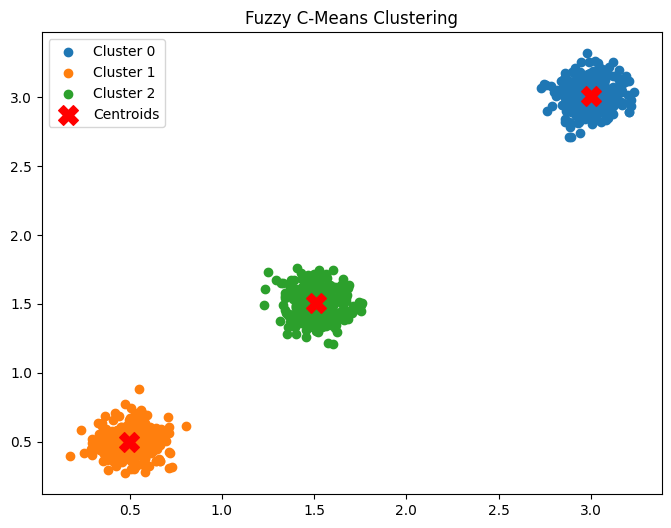

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Generate synthetic dataset
n_samples = 300
np.random.seed(42)
x1 = np.random.normal(loc=0.5, scale=0.1, size=(n_samples, 2))
x2 = np.random.normal(loc=1.5, scale=0.1, size=(n_samples, 2))
x3 = np.random.normal(loc=3.0, scale=0.1, size=(n_samples, 2))
X = np.vstack([x1, x2, x3])

# Perform Fuzzy C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X.T, c=3, m=2, error=0.005, maxiter=1000, init=None
)

# Predict cluster memberships
cluster_membership = np.argmax(u, axis=0)

# Visualize clustering0
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[cluster_membership == i, 0], X[cluster_membership == i, 1], label=f"Cluster {i}")
plt.scatter(cntr[:, 0], cntr[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.legend()
plt.title("Fuzzy C-Means Clustering")
plt.show()


**Semi-Supervised Clustering** 和 **Fuzzy C-Means** 是两种特殊的聚类方法，在一些场景中可以辅助分类任务。以下是它们的实现与相关说明：


### **模型特点、适用场景及优缺点**

#### **1. Semi-Supervised Clustering**
- **特点**：
  - 利用部分标签信息引导聚类。
  - 结合监督学习和无监督学习的优点。
- **适用场景**：
  - 数据中部分标签缺失。
  - 类别边界复杂，需要额外指导。
- **优缺点**：
  - **优点**：能有效利用部分标签信息。
  - **缺点**：需手动设置约束，性能对约束敏感。

---

#### **2. Fuzzy C-Means**
- **特点**：
  - 样本属于多个簇，具有模糊隶属度。
  - 提供更细粒度的聚类信息。
- **适用场景**：
  - 样本类别具有重叠区域。
  - 需要模糊分类结果的场景，如医学图像分割。
- **优缺点**：
  - **优点**：能捕获数据模糊性，适合复杂边界。
  - **缺点**：对初始化敏感，计算复杂度较高。

---

### **选型建议**

- 如果数据有部分标签，选择 **Semi-Supervised Clustering**。
- 如果类别边界模糊且需要归属度信息，选择 **Fuzzy C-Means**。


### 代码示例：聚类辅助分类
以下示例展示如何使用 KMeans 聚类结果作为特征，结合 RandomForestClassifier 进行分类。

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply KMeans clustering on training data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Add cluster labels as features
X_train_cluster = np.hstack([X_train, kmeans.labels_.reshape(-1, 1)])
X_test_cluster = np.hstack([X_test, kmeans.predict(X_test).reshape(-1, 1)])

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cluster, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_cluster)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with Clustering-Assisted Classification: {accuracy:.4f}")


Accuracy with Clustering-Assisted Classification: 0.7767
